### Anuvind MP
### AM.EN.U4AIE22010

### Q1

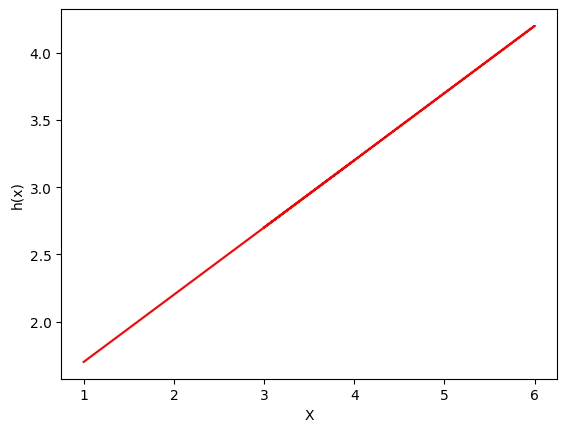

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
t0 = 1.2
t1 = 0.5
for i in x:
  hx = t0+t1*x

plt.plot(x,hx,'r')
plt.xlabel("X")
plt.ylabel("h(x)")
plt.show()

### Q2

In [ ]:
A = [1, 1, 2, 3, 4, 3, 4, 6, 4]
B = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
x = 0
for i in range(len(A)):
  x+= np.dot(A[i],B[i])
print(x)

82.0


### Q3

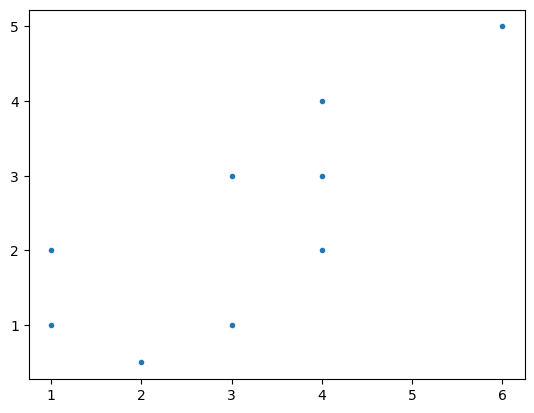

In [ ]:
plt.plot(A,B,'.')
plt.show()


### Q4

In [ ]:
mse = 0
for i in range(len(A)):
  mse+=(A[i] - B[i])**2

print(mse/len(A))

1.4722222222222223


### Q5

[242.685, 133.965, 64.125, 33.165000000000006, 32.265]


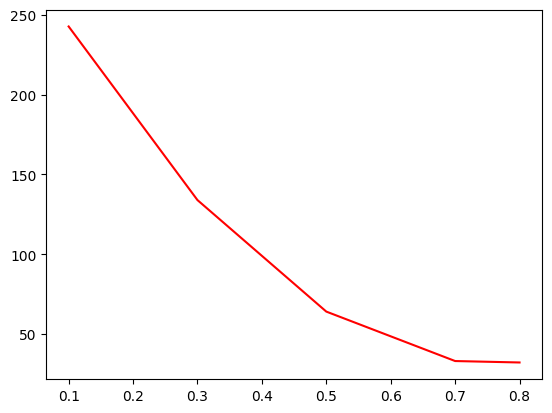

In [ ]:
h = lambda t,x : np.dot(t,x)
j = lambda n,t,A,B : np.sum(np.square(h(t,A) - B))/2*n

t1 = [0.1,0.3,0.5,0.7,0.8]
out = []
for i in t1:
  out.append(j(len(A),i,A,B))
print(out)
plt.plot(t1,out,'r')


### Part B

### Q1

In [ ]:
import pandas as pd

data = pd.read_csv('Students.csv')
dataset = data[['studytime']]

dataset.insert(1,"avg grade",(data['G1']+data['G2']+data['G3'])/3)

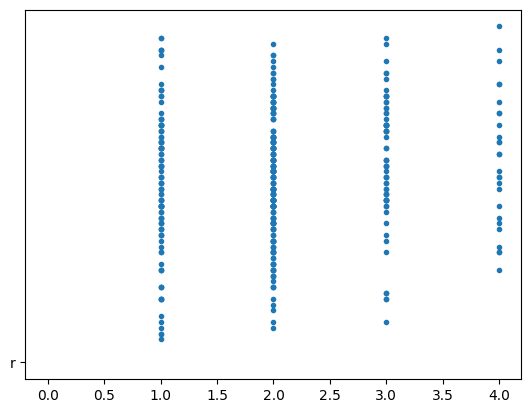

In [ ]:
plt.plot(dataset['studytime'],dataset['avg grade'],'.','r')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
regressor = LinearRegression()
X = dataset['studytime']
y = dataset['avg grade']

X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)



In [ ]:
print(mean_squared_error(y_test,y_pred))

0.8748319203236884


### Gradient Descent

In [ ]:
k = lambda x,theta : theta[0]*x + theta[1]
grad = lambda x,y,theta : (-2/y.shape[0])*np.array([np.sum(x*(y-k(x,theta))),np.sum((y-k(x,theta)))])

def grad_desc(alpha, x, y, max_iter=1500):
  theta = np.zeros(x.shape[1]+1)
  for i in range(max_iter):
    theta = theta - alpha*grad(x,y,theta)
  return theta

theta = grad_desc(0.1, X, y)

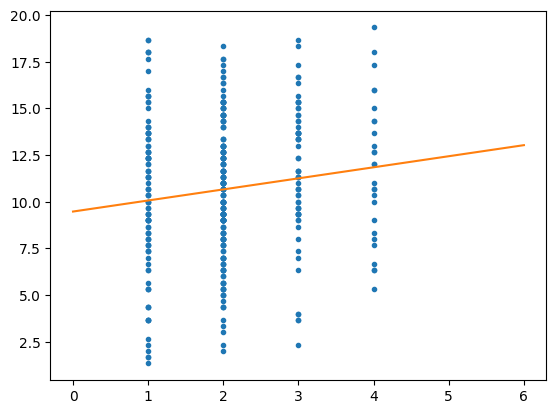

In [ ]:
plt.plot(X,y,".")
plt.plot(np.linspace(0,6,100),k(np.linspace(0,6,100),theta),"-")

In [ ]:
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

n_splits = 7
n_repeats = 5

a, b, c, rc = [], [], [], []

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for tr, te in kf.split(X):
    X_train, X_test = X[tr], X[te]
    y_train, y_test = y[tr], y[te]

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    me = np.mean(y_test - y_pred)
    a.append(me)
    mae = mean_absolute_error(y_test, y_pred)
    b.append(mae)
    mse = mean_squared_error(y_test, y_pred)
    c.append(mse)
    rmse = np.sqrt(mse)
    rc.append(rmse)

me, mae, mse, rmse = np.mean(a), np.mean(b), np.mean(c), np.mean(rc)
print("Simple K-Fold:")
print("ME: ", me, "MAE: ",mae,"MSE: ",mse,"RMSE: ",rmse)

Simple K-Fold:
ME:  -0.0037840739282395475 MAE:  2.9731256142021385 MSE:  13.525221129907312 RMSE:  3.6720114116473206


In [ ]:
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
ar, br, cr, rcr = [],[],[],[]

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    me = np.mean(y_test - y_pred)
    ar.append(me)
    mae = mean_absolute_error(y_test, y_pred)
    br.append(mae)
    mse = mean_squared_error(y_test, y_pred)
    cr.append(mse)
    rmse = np.sqrt(mse)
    rcr.append(rmse)

mer, maer, mser, rmser = np.mean(ar), np.mean(br), np.mean(cr), np.mean(rcr)
print("\nRepeated K-Fold Metrics:")
print("ME: ",mer, " MAE: ",maer, " MSE: ",mser, " RMSE: ",rmser)


Repeated K-Fold Metrics:
ME:  -0.0031085702915355103  MAE:  2.9694746983729687  MSE:  13.51296297654079  RMSE:  3.6689765829781638
